# Libraries

In [30]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout

# Data

In [31]:
# import train and test dataset
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [32]:
# training dataset
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
# test dataset
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# looking for missing values
print(train.isna().sum().sum())
print(test.isna().sum().sum())

0
0


# EDA

### Label count

C:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


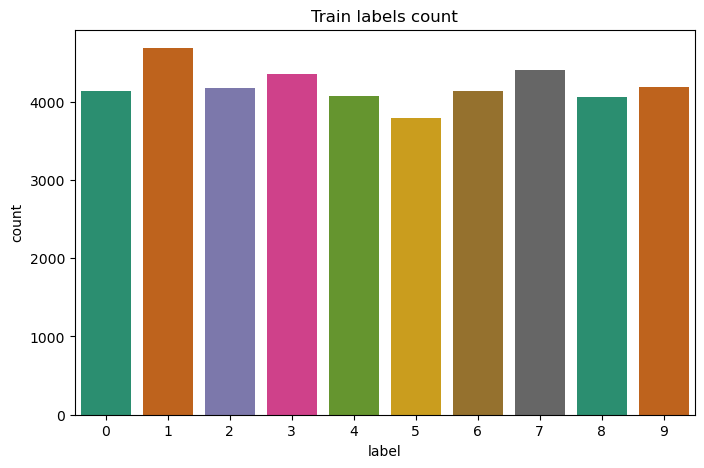

In [35]:
plt.figure(figsize=(8, 5))
sns.countplot(train['label'], palette='Dark2')
plt.title('Train labels count')
plt.show()

In [36]:
train['label'].value_counts().sort_index()

0    4132
1    4684
2    4177
3    4351
4    4072
5    3795
6    4137
7    4401
8    4063
9    4188
Name: label, dtype: int64

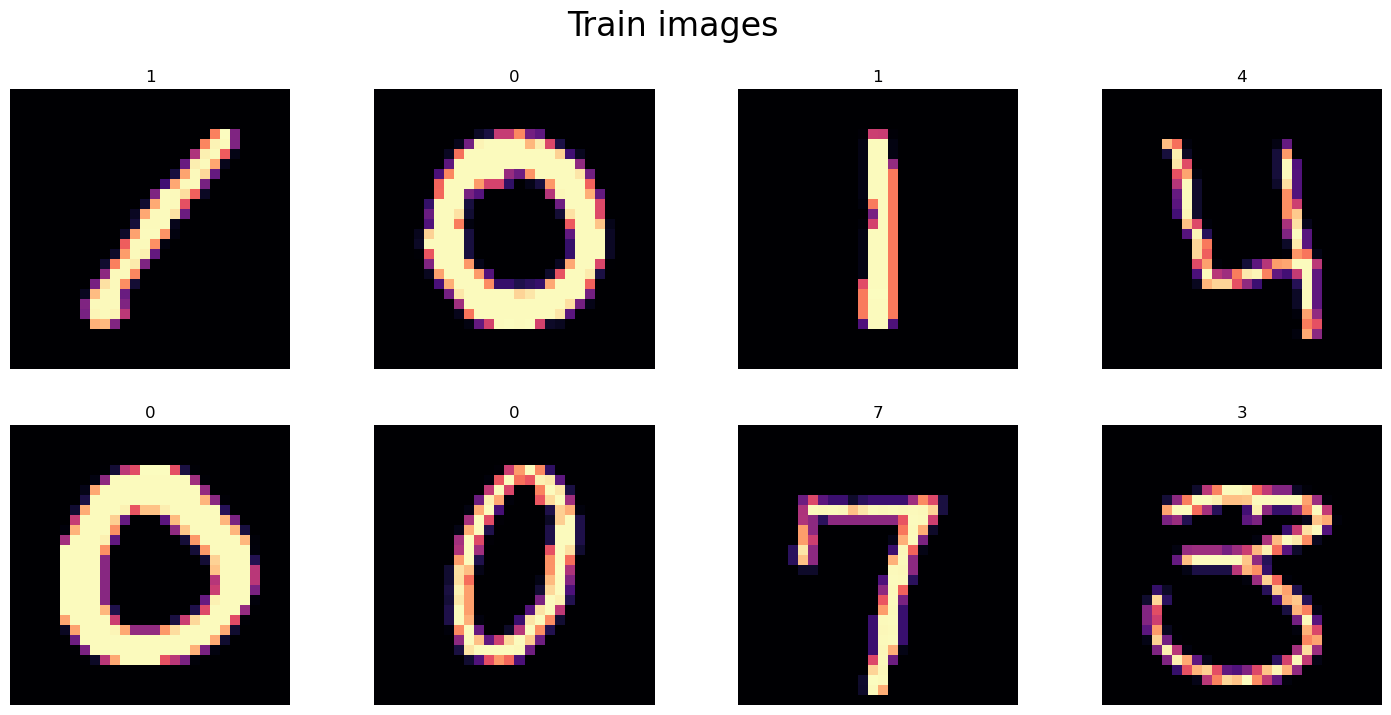

In [37]:
# first few train images with labels
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in train.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    plt.title(row[0])
    img = row.to_numpy()[1:].reshape(28, 28)
    fig.suptitle('Train images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

> Test images doesn't have labels  
> We need to create a model to predict them

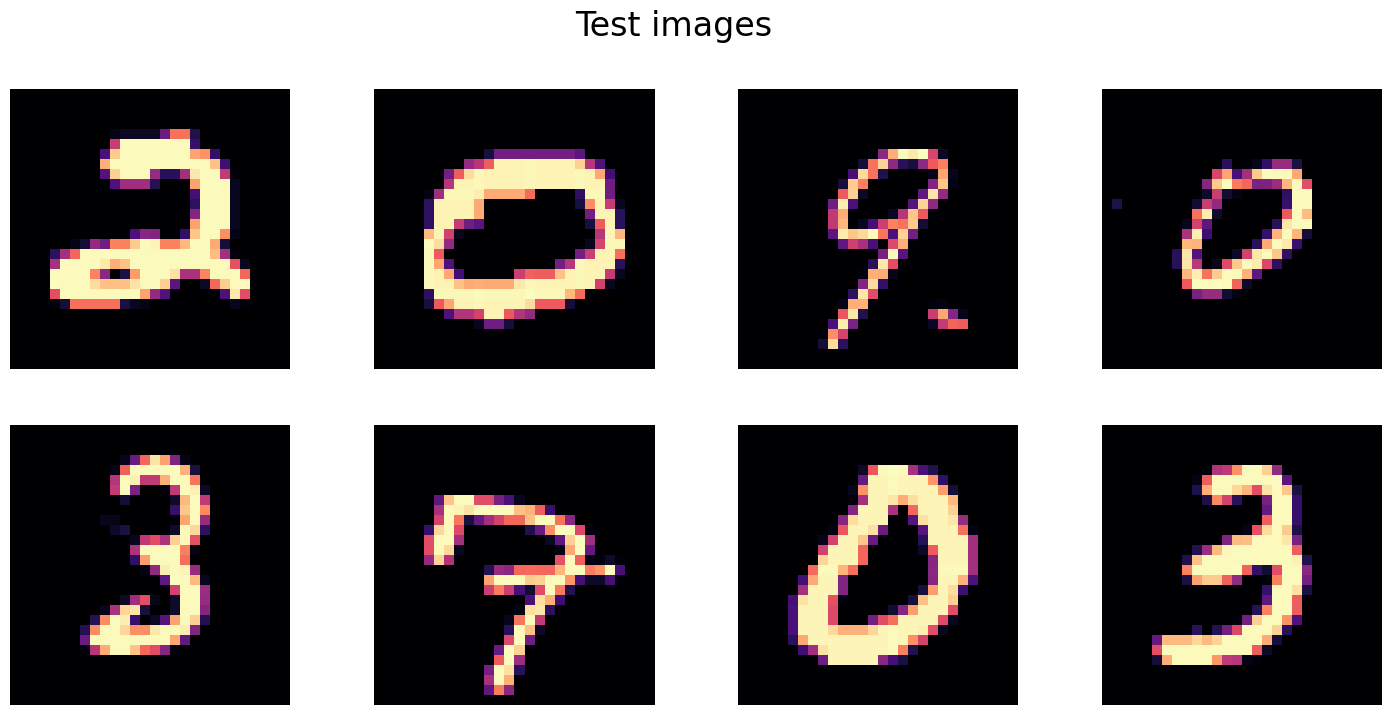

In [38]:
# first few test images
fig, ax = plt.subplots(figsize=(18, 8))
for ind, row in test.iloc[:8, :].iterrows():
    plt.subplot(2, 4, ind+1)
    img = row.to_numpy()[:].reshape(28, 28)
    fig.suptitle('Test images', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='magma')

# Preprocessing

In [39]:
# split into image and labels and convert to numpy array
X = train.iloc[:, 1:].to_numpy()
y = train['label'].to_numpy()

# test dataset
test = test.loc[:, :].to_numpy()

for i in [X, y, test]:
    print(i.shape)

(42000, 784)
(42000,)
(28000, 784)


In [40]:
# normalize the data
# ==================

X = X / 255.0
test = test / 255.0

In [41]:
# reshape dataset
# ===============

# shape of training and test dataset
print(X.shape)
print(test.shape)

# reshape the dataframe to 3x3 matrix with 1 channel grey scale values
X = X.reshape(-1,28,28,1)
test = test.reshape(-1,28,28,1)

# shape of training and test dataset
print(X.shape)
print(test.shape)

(42000, 784)
(28000, 784)
(42000, 28, 28, 1)
(28000, 28, 28, 1)


In [42]:
# one hot encode target
# =====================

# shape and values of target
print(y.shape)
print(y[0])

# convert Y_train to categorical by one-hot-encoding
y_enc = to_categorical(y, num_classes = 10)

# shape and values of target
print(y_enc.shape)
print(y_enc[0])

(42000,)
1
(42000, 10)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


In [43]:
# train test split
# ================

# random seed
random_seed = 2

# train validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(X, y_enc, test_size=0.3)

# shape
for i in [X_train, y_train_enc, X_val, y_val_enc]:
    print(i.shape)

(29400, 28, 28, 1)
(29400, 10)
(12600, 28, 28, 1)
(12600, 10)


## Plot images

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


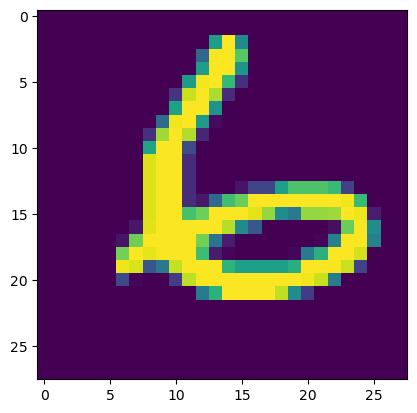

In [44]:
g = plt.imshow(X_train[0][:,:,0])
print(y_train_enc[0])

[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


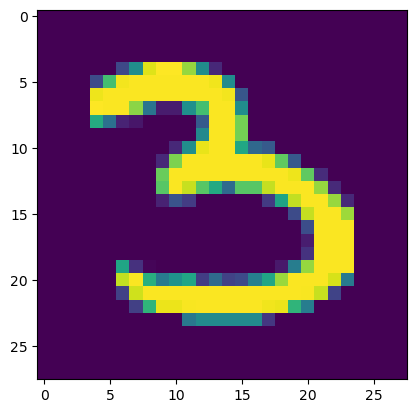

In [45]:
g = plt.imshow(X_train[9][:,:,0])
print(y_train_enc[9])

# CNN

### Model parameters

In [46]:
INPUT_SHAPE = (28,28,1)
OUTPUT_SHAPE = 10
BATCH_SIZE = 128
EPOCHS = 10
VERBOSE = 2

### Define CNN Model

In [47]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=INPUT_SHAPE))
model.add(MaxPool2D((2,2)))

model.add(Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(MaxPool2D((2,2)))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))

model.add(Dense(10, activation='softmax'))

### Compile model

In [48]:
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

### Model summary

In [49]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense_3 (Dense)             (None, 128)              

### Model fitting

In [51]:
history = model.fit(X_train, y_train_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
161/161 - 6s - loss: 0.5723 - accuracy: 0.8173 - val_loss: 0.1218 - val_accuracy: 0.9641 - 6s/epoch - 37ms/step
Epoch 2/10
161/161 - 6s - loss: 0.1424 - accuracy: 0.9580 - val_loss: 0.0757 - val_accuracy: 0.9760 - 6s/epoch - 36ms/step
Epoch 3/10
161/161 - 6s - loss: 0.1023 - accuracy: 0.9685 - val_loss: 0.0604 - val_accuracy: 0.9820 - 6s/epoch - 36ms/step
Epoch 4/10
161/161 - 5s - loss: 0.0810 - accuracy: 0.9760 - val_loss: 0.0613 - val_accuracy: 0.9805 - 5s/epoch - 34ms/step
Epoch 5/10
161/161 - 5s - loss: 0.0645 - accuracy: 0.9801 - val_loss: 0.0570 - val_accuracy: 0.9837 - 5s/epoch - 33ms/step
Epoch 6/10
161/161 - 7s - loss: 0.0541 - accuracy: 0.9832 - val_loss: 0.0480 - val_accuracy: 0.9851 - 7s/epoch - 42ms/step
Epoch 7/10
161/161 - 8s - loss: 0.0424 - accuracy: 0.9867 - val_loss: 0.0468 - val_accuracy: 0.9850 - 8s/epoch - 49ms/step
Epoch 8/10
161/161 - 9s - loss: 0.0402 - accuracy: 0.9874 - val_loss: 0.0478 - val_accuracy: 0.9863 - 9s/epoch - 54ms/step
Epoch 9/10
161/1

### Accurayc and loss

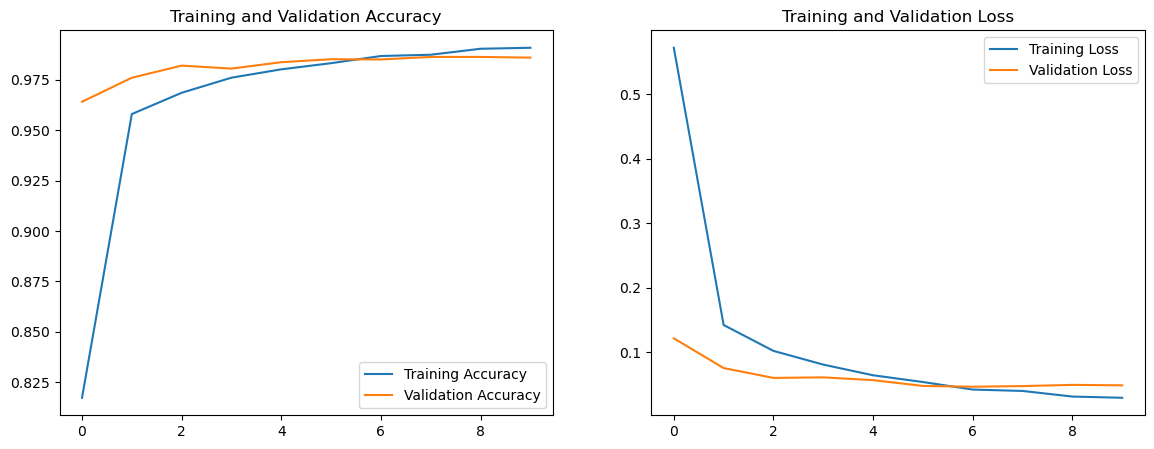

In [52]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')

plt.savefig('./foo.png')
plt.show()

### Evaluating on validationa dataset

In [53]:
# model loss and accuracy on validation set
model.evaluate(X_val, y_val_enc, verbose=False)

[0.05175592005252838, 0.9849206209182739]

In [54]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

394/394 [==============================] - 1s 3ms/step
[3.9717966e-06 3.4671810e-08 1.2062223e-05 9.5241749e-06 3.0343081e-05
 1.7841212e-07 7.1998341e-09 4.3941947e-04 9.1753263e-06 9.9949527e-01]
9


In [55]:
print(classification_report(y_act, y_pred))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      1254
           1       0.99      1.00      0.99      1419
           2       0.99      0.98      0.99      1248
           3       0.98      0.99      0.99      1316
           4       0.98      0.99      0.99      1200
           5       0.99      0.98      0.98      1134
           6       0.99      1.00      0.99      1206
           7       0.96      0.99      0.98      1356
           8       0.99      0.97      0.98      1188
           9       0.99      0.96      0.97      1279

    accuracy                           0.98     12600
   macro avg       0.99      0.98      0.98     12600
weighted avg       0.99      0.98      0.98     12600



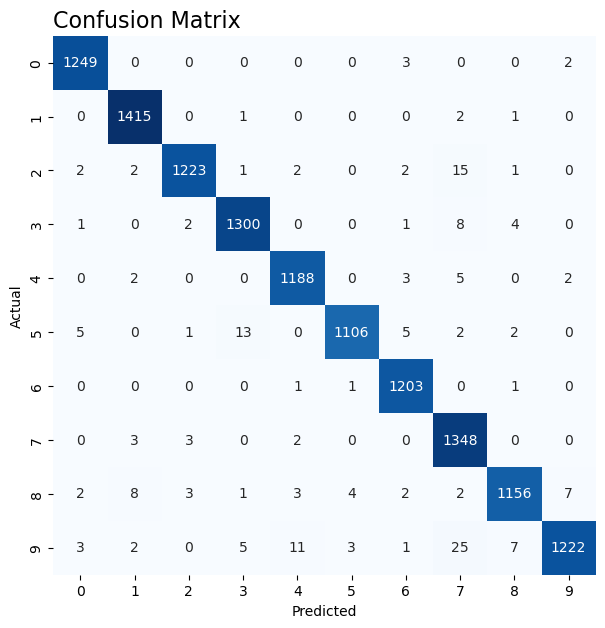

In [56]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

In [57]:
history = model.fit(X_val, y_val_enc,
                    epochs=EPOCHS,
                    batch_size=BATCH_SIZE,
                    verbose=VERBOSE,
                    validation_split=0.3)

Epoch 1/10
69/69 - 2s - loss: 0.0668 - accuracy: 0.9814 - val_loss: 0.0431 - val_accuracy: 0.9862 - 2s/epoch - 35ms/step
Epoch 2/10
69/69 - 2s - loss: 0.0478 - accuracy: 0.9864 - val_loss: 0.0378 - val_accuracy: 0.9902 - 2s/epoch - 36ms/step
Epoch 3/10
69/69 - 2s - loss: 0.0355 - accuracy: 0.9888 - val_loss: 0.0421 - val_accuracy: 0.9870 - 2s/epoch - 34ms/step
Epoch 4/10
69/69 - 2s - loss: 0.0260 - accuracy: 0.9916 - val_loss: 0.0384 - val_accuracy: 0.9889 - 2s/epoch - 36ms/step
Epoch 5/10
69/69 - 2s - loss: 0.0207 - accuracy: 0.9938 - val_loss: 0.0438 - val_accuracy: 0.9894 - 2s/epoch - 36ms/step
Epoch 6/10
69/69 - 2s - loss: 0.0182 - accuracy: 0.9944 - val_loss: 0.0461 - val_accuracy: 0.9884 - 2s/epoch - 35ms/step
Epoch 7/10
69/69 - 2s - loss: 0.0176 - accuracy: 0.9948 - val_loss: 0.0442 - val_accuracy: 0.9886 - 2s/epoch - 36ms/step
Epoch 8/10
69/69 - 3s - loss: 0.0170 - accuracy: 0.9955 - val_loss: 0.0485 - val_accuracy: 0.9884 - 3s/epoch - 37ms/step
Epoch 9/10
69/69 - 3s - loss: 0.

In [58]:
# predicted values
y_pred_enc = model.predict(X_val)

# actual
y_act = [np.argmax(i) for i in y_val_enc]

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

394/394 [==============================] - 1s 3ms/step
[8.78091896e-07 4.71128381e-09 3.64133797e-07 6.58579324e-07
 1.00989244e-04 4.21707853e-07 1.30237077e-09 1.01715759e-05
 8.64799972e-07 9.99885678e-01]
9


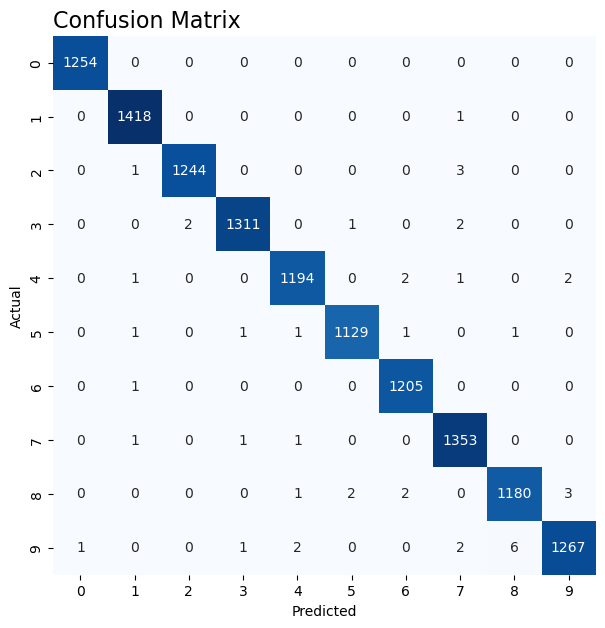

In [59]:
fig, ax = plt.subplots(figsize=(7, 7))
sns.heatmap(confusion_matrix(y_act, y_pred), annot=True, 
            cbar=False, fmt='1d', cmap='Blues', ax=ax)
ax.set_title('Confusion Matrix', loc='left', fontsize=16)
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
plt.show()

### Predicting on test

In [60]:
# predicted values
y_pred_enc = model.predict(test)

# decoding predicted values
y_pred = [np.argmax(i) for i in y_pred_enc]

print(y_pred_enc[0])
print(y_pred[0])

875/875 [==============================] - 3s 3ms/step
[2.6986027e-09 9.1360827e-13 1.0000000e+00 1.0916600e-12 2.3253391e-12
 1.3075088e-15 2.5455514e-11 1.8335977e-10 1.4921622e-12 2.7647579e-14]
2


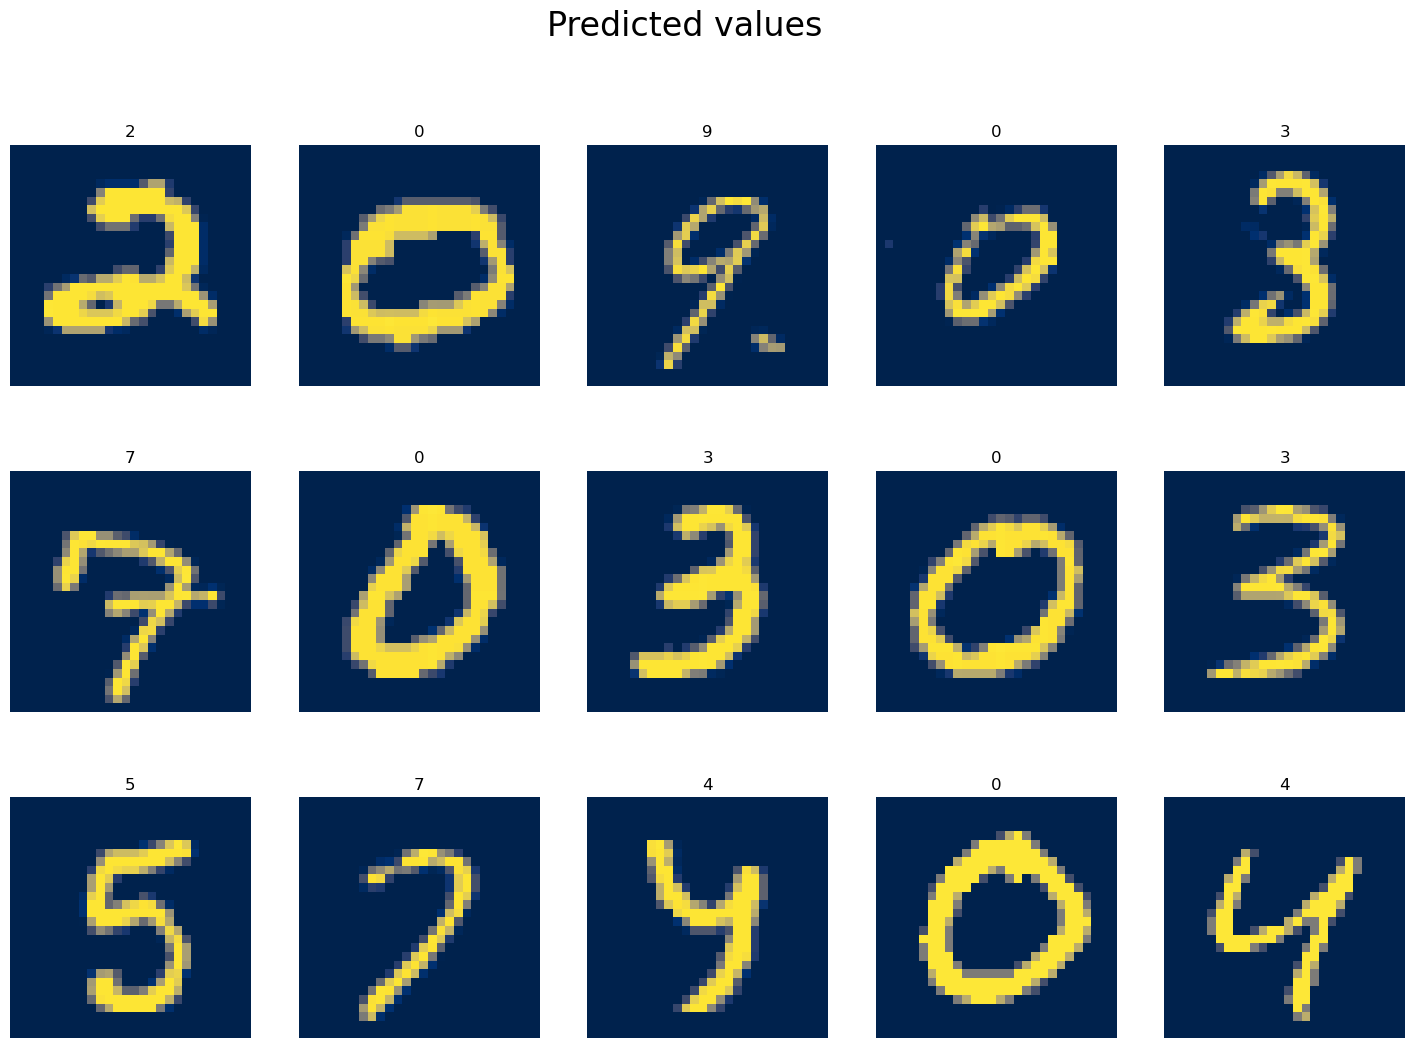

In [61]:
# predicted targets of each images
# (labels above the images are predicted labels)
fig, ax = plt.subplots(figsize=(18, 12))
for ind, row in enumerate(test[:15]):
    plt.subplot(3, 5, ind+1)
    plt.title(y_pred[ind])
    img = row.reshape(28, 28)
    fig.suptitle('Predicted values', fontsize=24)
    plt.axis('off')
    plt.imshow(img, cmap='cividis')

In [62]:
model.save('mnist.h5')